# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [169]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline 

# Importing the dataset:
The dataset we are using for this assignment is taken from UCI Machine Learning Repository. The dataset consists of Attributes/Factors that contribute to prediction of Diabetic Retinopathy(DR) in a diabetic patient. Given some predictors, we need to predict the value of target variable i.e. DR or Non-DR case. The dataset is given in the file data1.csv  

In [170]:
# TODO - Read the file into a pandas data frame - 5 points
df = pd.read_csv('Cryotherapy.csv')
print(df.shape)

(90, 7)


In [171]:
# TODO - Drop columns that have missing values - 5 points
df1 = df.dropna()
print(df1.shape)

(90, 7)


In [172]:
# TODO - Convert the df1 data frame into a numpy array named df2. Use values method of dataframes - 5 points
df2 = df1.to_numpy()
print(df2.shape)

(90, 7)


In [173]:
# TODO - Select all rows and first 19 columns as X from df2 and select all rows and last column as Y from df2 - 5 points
X = df2[:, :-1]
Y = df2[:, -1]

In [174]:
# Splitting the dataset into training and test data.
# TODO - Select first 600 rows as training dataset and the remaining rows as test dataset - 5 points
number_of_examples = X.shape[0]
train_portion = 0.8
X_train = X[:int(train_portion * number_of_examples), :]
X_test = X[int(train_portion * number_of_examples): , :]
Y_train = Y[:int(train_portion * number_of_examples)]
Y_test = Y[int(train_portion * number_of_examples):]

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [193]:
acc_train_svm_linear = []

In [194]:
acc_test_svm_linear = []

In [195]:
c_svm_linear = []

In [196]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_linear.fit(X_train, Y_train)

    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)
    

In [197]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.708333
Test Accuracy = 0.722222
Train Accuracy = 0.791667
Test Accuracy = 0.888889
Train Accuracy = 0.930556
Test Accuracy = 0.888889
Train Accuracy = 0.916667
Test Accuracy = 0.833333
Train Accuracy = 0.944444
Test Accuracy = 0.833333
Train Accuracy = 0.930556
Test Accuracy = 0.888889


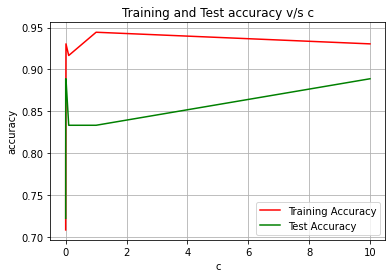

In [198]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.


# Use the following function to have a legend
plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Training and Test accuracy v/s c')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Change the value of parameter C above and see the difference in the results.

# SVM using Radial Basis Function(RBF) Kernel.

In [199]:
acc_train_svm_rbf = []

In [200]:
acc_test_svm_rbf = []

In [201]:
c_svm_rbf = []

In [202]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c) - 5 points
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_rbf.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_rbf.append(c)
    

In [203]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
for c in cVals:
    svm_rbf(c)

Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.708333
Test Accuracy = 0.666667
Train Accuracy = 0.805556
Test Accuracy = 0.888889


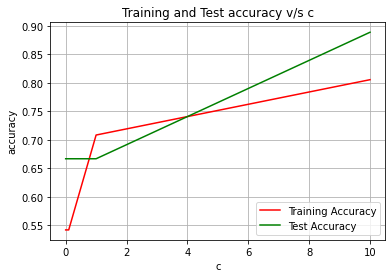

In [204]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

# Use the following function to have a legend
plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Training and Test accuracy v/s c')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Change the value of parameter C and gamma above and see the difference in the results. 

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [205]:
acc_train_svm_poly = []

In [206]:
acc_test_svm_poly = []

In [207]:
c_svm_poly = []

In [208]:
def svm_polynomial(c):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'poly', C = c) - 5 points
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    A = X_train[0:300,:]  # First 300 rows of training set.
    B = Y_train[0:300]  
    C = X_test[0:100,:]   # First 100 rows of test set.
    D = Y_test[0:100]
    
    # TODO - Fit the classifier on the training set - 5 points
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = svc_polynomial.score(X_train, Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = svc_polynomial.score(X_test, Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_poly.append(c)
    

In [209]:
# Call the above function i.e. svm_poly with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
# Redefining cVals because poly takes a long time to run with larger values of c since 
# the larger the value of c, the lesser the amount of regulatization
cVals = np.geomspace(0.000001, 0.001, 5)
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.541667
Test Accuracy = 0.666667
Train Accuracy = 0.541667
Test Accuracy = 0.666667


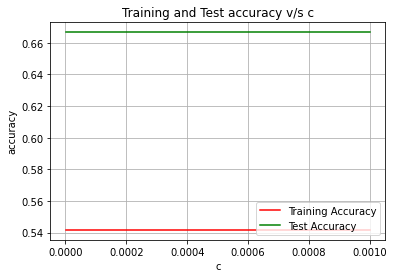

In [210]:
# TODO - Write code to plot 2 plots - 10 points
# Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
# Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.

# Use the following function to have a legend
plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('Training and Test accuracy v/s c')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Change the value of parameter C and see the difference in the results.

# Repeating the Assignment with 2 more Datasets:
1) Cryotherapy.csv (Predict result of treatment using 6 predictors).<br>
2) Immunotherapy.csv (Predict result of treatment using 7 predictors).
### You have to repeat the full assignment with 2 more different datasets. You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment. For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter. You have to write this for all the 3 datasets in a single pdf file. Do not write explainations, just discuss your results / observations point to point. (10 points each)